# Stage 1 of Loan Approval

# Data preprocessing

## Load the data

We load the data with pandas and display the first rows of the dataset and the shape


In [351]:
import pandas as pd

data = pd.read_csv("train.csv")
print("---------- raw data ----------")
display(data.head(5))
print(data.shape)

---------- raw data ----------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


(614, 13)


### Explanation of the Dataset Columns:
1. **Loan_ID**: A unique identifier for each loan application.
2. **Gender**: The gender of the applicant (e.g., Male or Female).
3. **Married**: Indicates if the applicant is married (Yes/No).
4. **Dependents**: The number of dependents supported by the applicant (e.g., 0, 1, 2, or 3+).
5. **Education**: The education level of the applicant (Graduate/Not Graduate).
6. **Self_Employed**: Indicates if the applicant is self-employed (Yes/No).
7. **ApplicantIncome**: The income of the primary applicant.
8. **CoapplicantIncome**: The income of the co-applicant (if any).
9. **LoanAmount**: The amount of the loan requested (in thousands, possibly missing in some cases as seen in the first row).
10. **Loan_Amount_Term**: The term of the loan in months (e.g., 360 months = 30 years).
11. **Credit_History**: A binary indicator of credit history (1.0 = good credit history, 0.0 = poor credit history).
12. **Property_Area**: The area where the property is located (Urban/Rural/Semiurban).
13. **Loan_Status**: The outcome of the loan application (Y = Approved, N = Rejected).

## Check for missing values

We check for missing values for each columns

In [352]:
print("---------- missing values ----------")
print(data.isnull().sum())

---------- missing values ----------
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### Missing Values Analysis
The table shows the count of missing values in each column of the dataset. Below is a summary of the findings:

1. **Loan_ID**: 
   - No missing values (0).

2. **Gender**: 
   - 13 missing values. 
   - Action: Impute missing values with the mode (most common value) or analyze if these rows can be dropped without affecting the data quality.

3. **Married**: 
   - 3 missing values. 
   - Action: Impute with the mode or investigate the patterns of missingness.

4. **Dependents**: 
   - 15 missing values. 
   - Action: Impute with the mode, especially if the majority of applicants have no dependents (0).

5. **Education**: 
   - No missing values (0).

6. **Self_Employed**: 
   - 32 missing values. 
   - Action: Impute with the mode, since self-employment might not be as common in the dataset.

7. **ApplicantIncome**: 
   - No missing values (0).

8. **CoapplicantIncome**: 
   - No missing values (0).

9. **LoanAmount**: 
   - 22 missing values. 
   - Action: Impute using the median or mean, as loan amounts are continuous and likely skewed.

10. **Loan_Amount_Term**: 
    - 14 missing values. 
    - Action: Impute with the most common value (e.g., 360 months).

11. **Credit_History**: 
    - 50 missing values. 
    - Action: Impute with the mode (1.0 = good credit history) or treat as a separate category if the missingness itself is meaningful.

12. **Property_Area**: 
    - No missing values (0).

13. **Loan_Status**: 
    - No missing values (0).


### Next Steps for Handling Missing Values
1. **Categorical Variables**: 
   - Use labelencoder to transform categorical columns.

2. **Numerical Variables**: 
   - Use the median for numerical columns.

## Handle Missing Values

- Here we drop the loan id column because it doesn't give us any information about the target column
- We fill the missing values of numerical columns using the mean
- We fill the missing values of categorical columns with 'Unknown'
- We use LabelEncoder to transform the encode the data of categorical columns to integer
- We then display the first rows of the data to see if the transformation was succesful

In [353]:
# drop Loan_ID column (irrelevant for modeling)
if 'Loan_ID' in data.columns:
    data = data.drop('Loan_ID', axis=1)

numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# fill numeric columns NaN values with their mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# fill non-numeric columns NaN values with 'Unknown'
non_numeric_cols = []
for column in data.columns:
    if column not in numeric_cols:
        non_numeric_cols.append(column)
data[non_numeric_cols] = data[non_numeric_cols].fillna('Unknown')

# transforming text values into numeric values where applicable
from sklearn.preprocessing import LabelEncoder

# encode non-numeric columns
label_encoders = {}
for column in non_numeric_cols:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# display the first few rows of the transformed dataset
print("---------- transformed data ----------")
display(data.head(5))
print(data.shape)

---------- transformed data ----------


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,2,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,2,0,0,2,3000,0.0,66.000000,360.0,1,2,1
3,1,2,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


(614, 12)


### Transformed Data Explanation

The dataset has been succesfuly transformed. Here is an explanation of the transformed columns:

#### Features:
1. **Gender**: 
   - Encoded to numerical values: 
     - `1` = Male 
     - `0` = Female.
     - `2` = Missing cases.

2. **Married**: 
   - Encoded to numerical values: 
     - `0` = Not Married, 
     - `1` = Married,
     - `2` = Missing cases.

3. **Dependents**: 
   - Represents the number of dependents as numerical values.
   - Values range from `0` to `3+`, encoded numerically. Cases like `4` likely indicate missing cases.

4. **Education**: 
   - Encoded to numerical values:
     - `0` = Graduate, 
     - `1` = Not Graduate.

5. **Self_Employed**: 
   - Encoded to numerical values: 
     - `0` = Not Self-Employed,
     - `1` = Self-Employed,
     - `2` = Missing cases.

6. **ApplicantIncome**: 
   - The income of the primary applicant, retained as a continuous numerical variable.

7. **CoapplicantIncome**: 
   - The income of the co-applicant, retained as a continuous numerical variable.

8. **LoanAmount**: 
   - Represents the loan amount requested by the applicant.

9. **Loan_Amount_Term**: 
   - Represents the loan repayment term in months (e.g., `360` = 30 years, `180` = 15 years).

10. **Credit_History**: 
    - A binary variable indicating credit history:
      - `1` = Good credit history,
      - `0` = Poor credit history,
      - `2` = Missing cases.

11. **Property_Area**: 
    - Encoded to numerical values:
      - `0` = Rural,
      - `1` = Semiurban,
      - `2` = Urban.

12. **Loan_Status**: 
    - The target variable for prediction:
      - `1` = Loan Approved,
      - `0` = Loan Rejected.

---

## Class imbalance

- Before training our model we are going to check the class imbalance of our target column 'Loan_Status'.   
<br>
- We also need to take into account that if the model predict 1 (Yes) but it's 0 (No), then it is dangerous because we predicted that the person is going the pay back the loan when in reality it's not the case. This could lead to big financial losses for a bank for example. Compare to if the model predicts 0 (No) but it's 1 (Yes) it's less important, yes the bank will miss out on some gains but its more important to not lose money for a bank.

In [354]:
# count the number of each value in the Loan_Status column
loan_status_counts = data['Loan_Status'].value_counts()
print(loan_status_counts)

# calculate the ratio
ratio = loan_status_counts[1] / loan_status_counts[0]
print("ratio:",round(ratio, 2))

Loan_Status
1    422
0    192
Name: count, dtype: int64
ratio: 2.2


**Observations**:
   - The dataset has more approved loans than rejected loans, creating a class imbalance.
   - This imbalance may impact the performance of machine learning models, especially for the minority class (`Loan_Status = 0`).

**Action Plan**:
   - **Class Weights**: Use algorithms that allow weighting classes to penalize misclassifications in the minority class.
---

# Data Visualisation

## Statistical data

We use the describe method to display some statistic information about our data

In [355]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,1.301303,0.842020,0.218241,0.319218,5403.459283,1621.245798,146.412162,342.000000,0.936482,1.037459,0.687296
std,0.421752,0.951738,1.120531,0.413389,0.696570,6109.041673,2926.248369,84.037468,64.372489,0.471924,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,2.000000,1.000000



#### Observations:
1. **Class Imbalance**:
   - The `Loan_Status` mean confirms class imbalance, as the majority of loans are approved.

2. **High Variability**:
   - Significant variation exists in `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount`, indicated by their high standard deviations.

3. **Loan Terms**:
   - The most common loan term is `360` months (30 years), as indicated by the 25th, 50th, and 75th percentiles.

4. **Credit History**:
   - The high mean for `Credit_History` indicates that most applicants have a good credit history.

---


## Correlation matrix

We use seaborn librairy to display the correlation between each column.

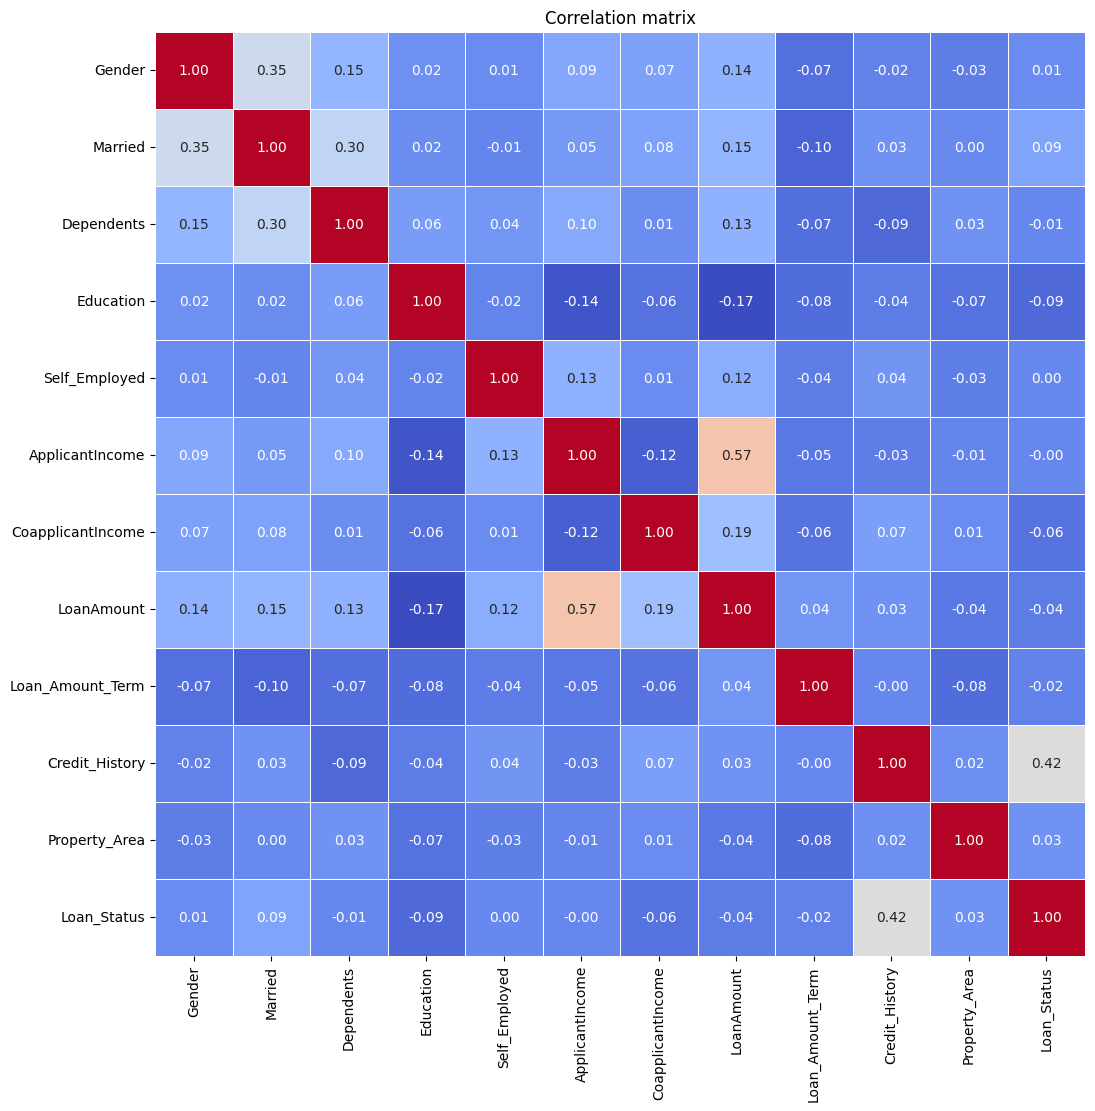

In [356]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False)
plt.title('Correlation matrix')
plt.show()

#### Observations:
1. **Credit_History Stands Out**:
   - The strongest positive correlation with `Loan_Status` is observed for `Credit_History`. This aligns with the expectation that good credit history is critical for loan approval.

2. **Income and LoanAmount**:
   - Higher income (both Applicant and Coapplicant) is linked to larger loan amounts, as reflected by the moderate correlation.

## visualisation of correlation

We create a pair plot to visualize relationships between variables in our dataset. The hue parameter colors the points based on the 'Loan_Status' variable, showing how relationships change across different categories.

<Figure size 1200x1200 with 0 Axes>

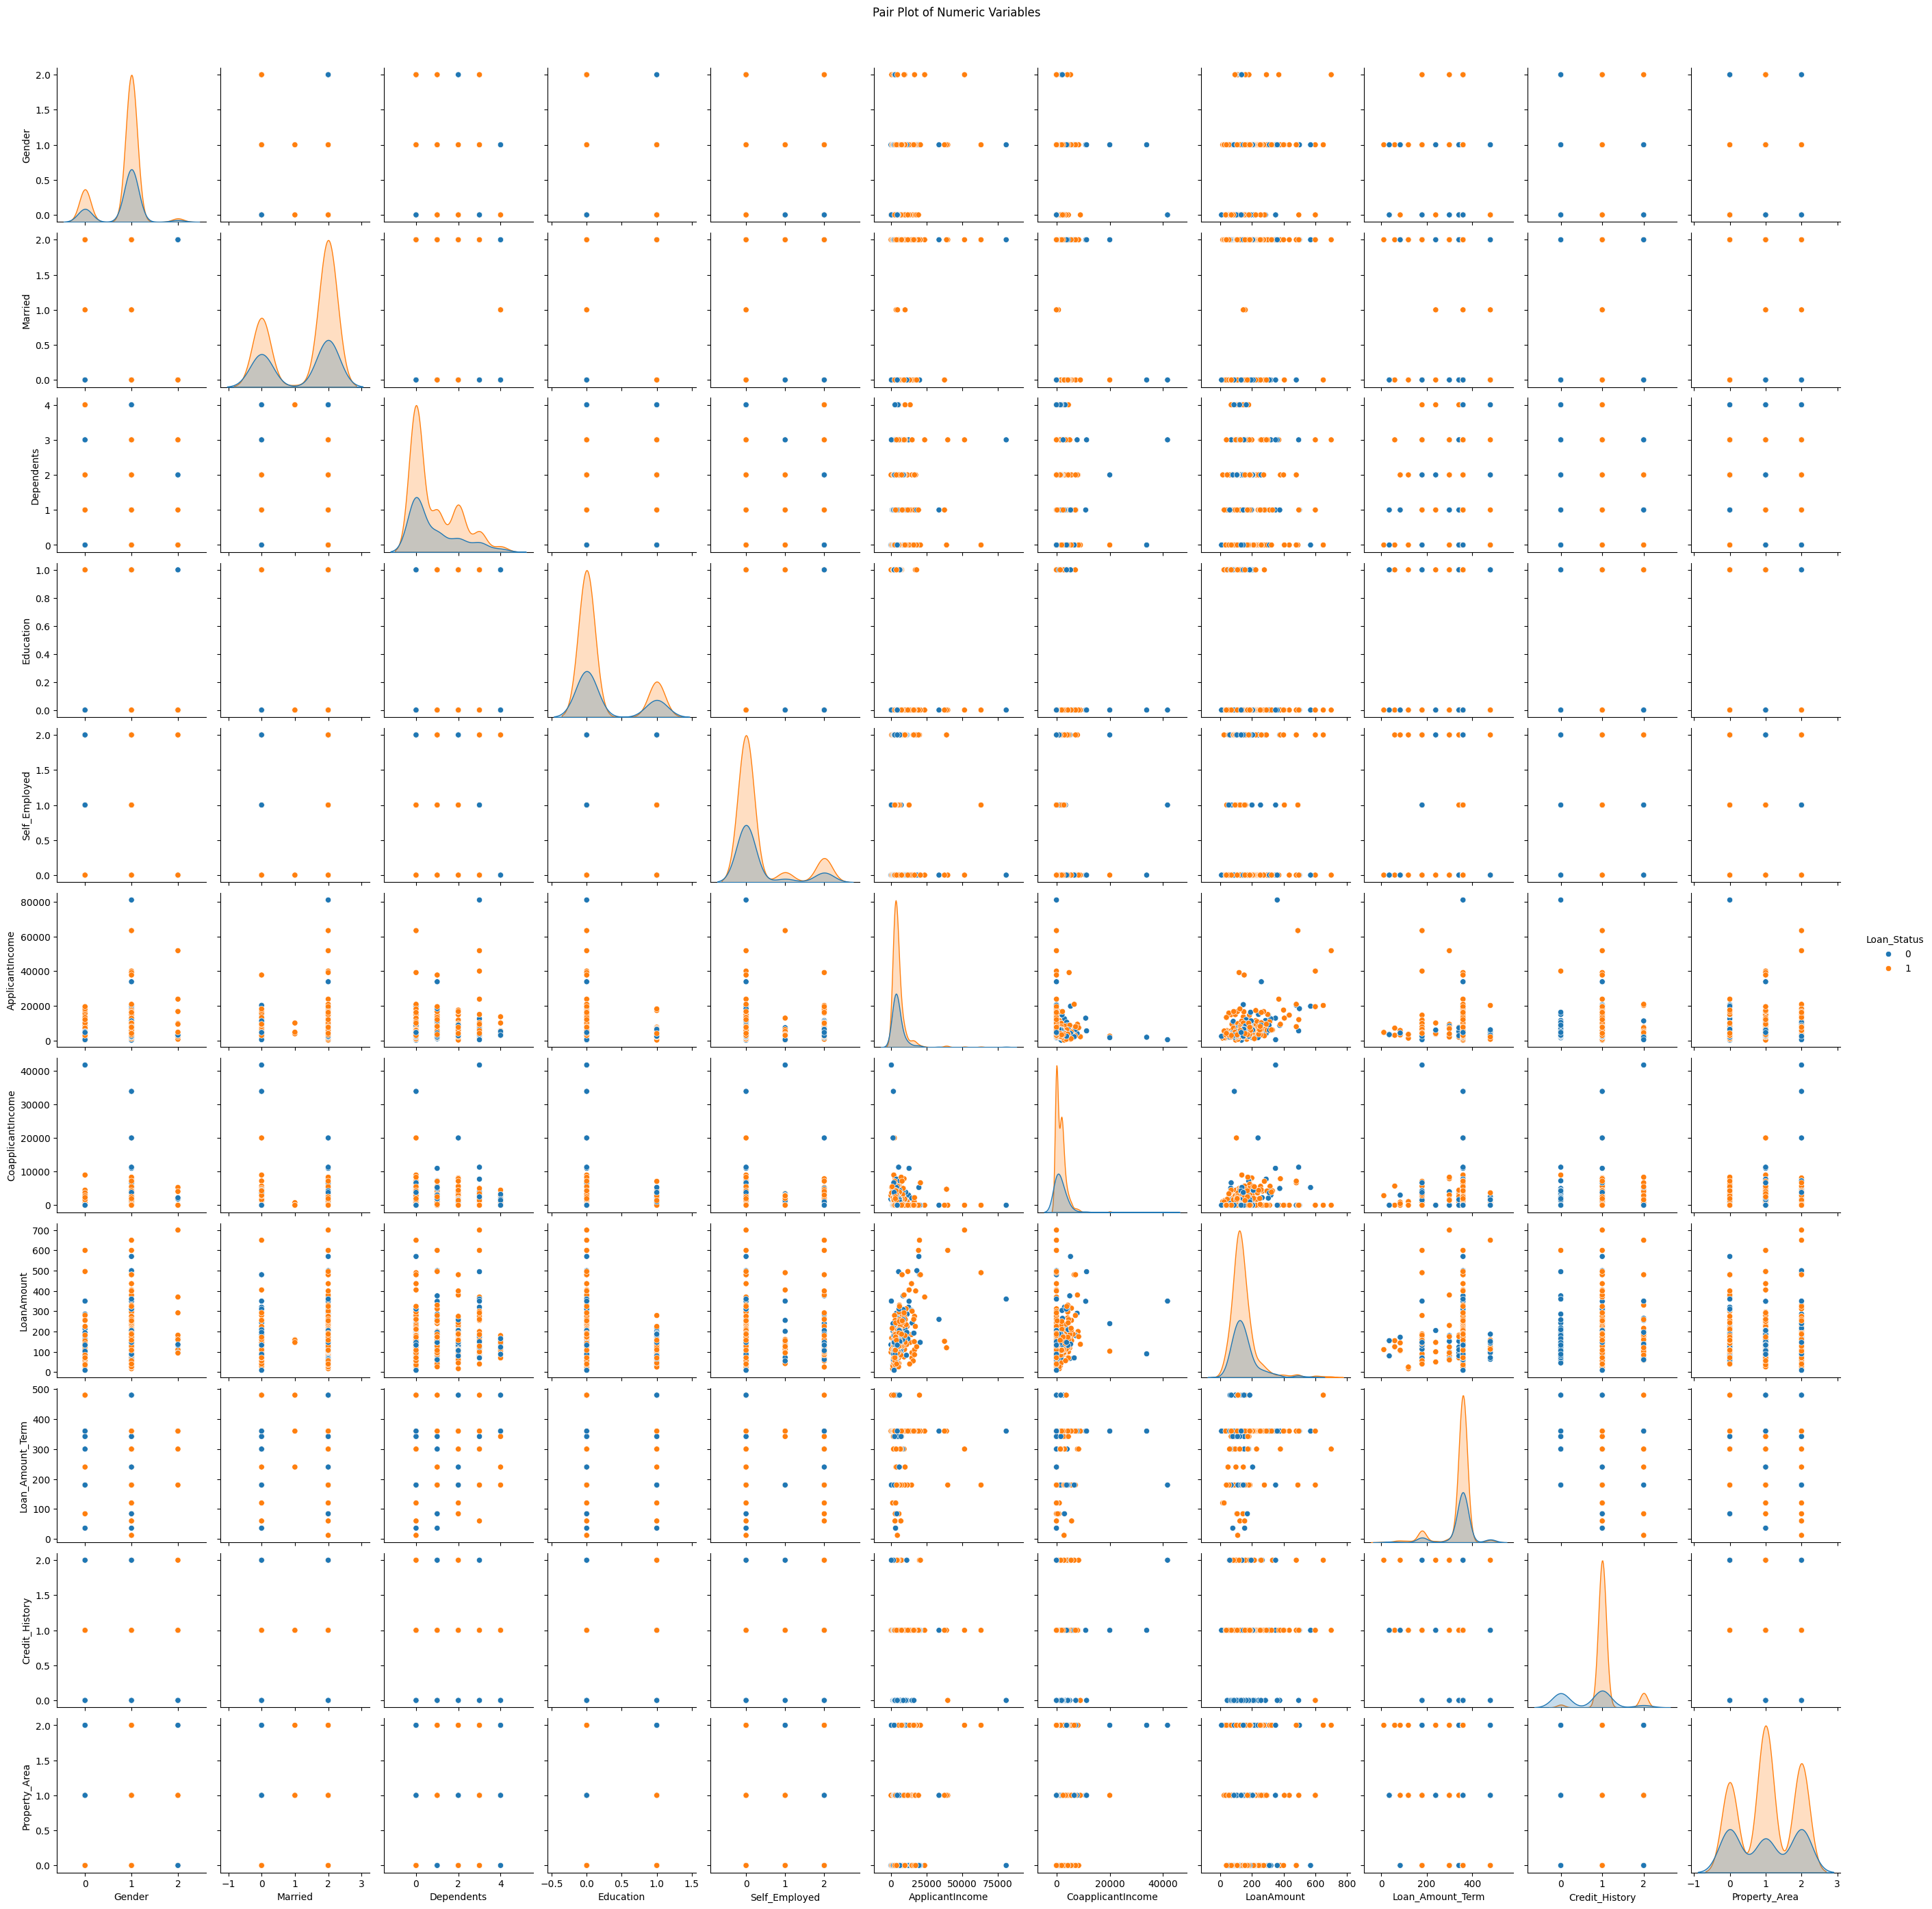

In [357]:
plt.figure(figsize=(12, 12))
sns.pairplot(data, diag_kind='kde', corner=False, hue='Loan_Status')
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

### Observations:
1. **Key Predictors**:
   - `Credit_History` has a strong relationship with `Loan_Status`.
   - `ApplicantIncome` and `LoanAmount` show moderate relationships.

2. **Weak Predictors**:
   - Features like `Education`, `Property_Area`, and `Loan_Amount_Term` show weak relationships with `Loan_Status`.

---

## Distribution of non categorical columns

We create a function to plot the distributions of multiple variables in a dataset using histograms with kernel density estimates, allowing us to visualize and understand the characteristics of the data.

ApplicantIncome dtype: int64
CoapplicantIncome dtype: float64
LoanAmount dtype: float64
Loan_Amount_Term dtype: float64


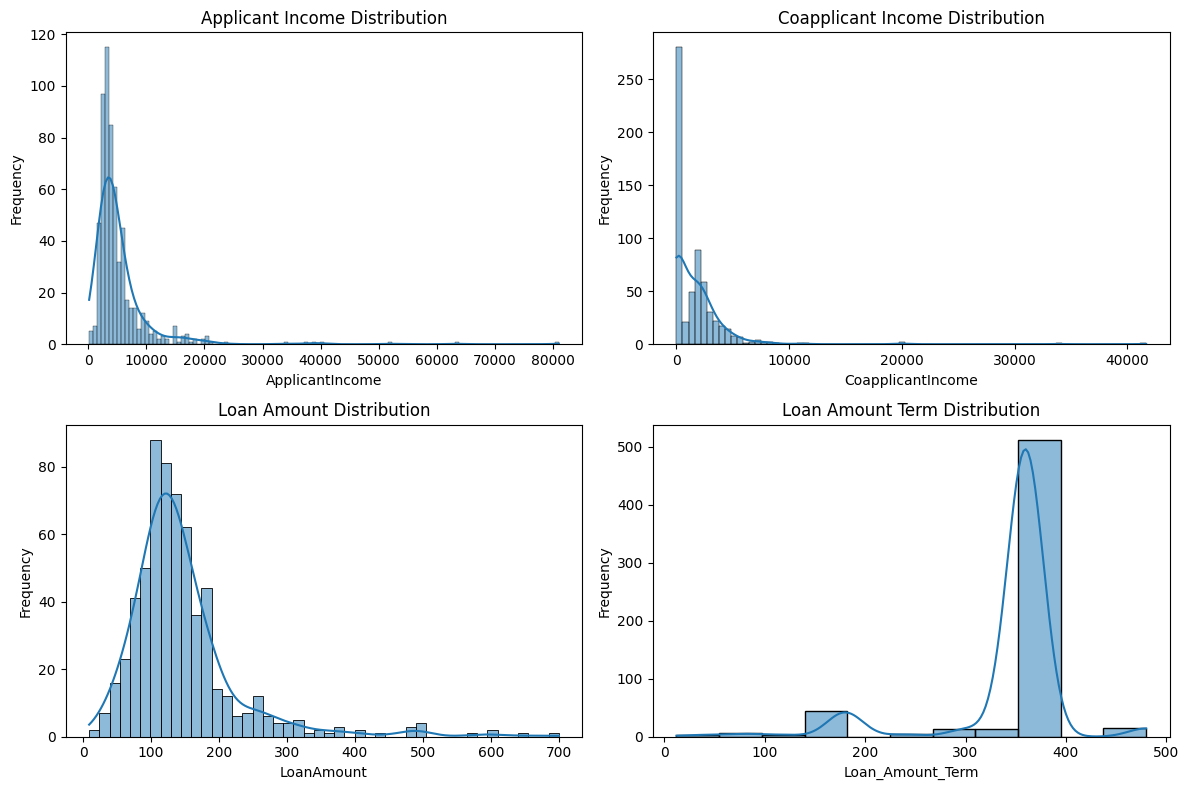

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(data, columns, titles):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()  # Flatten for easy iteration

    for i, (column, title) in enumerate(zip(columns, titles)):
        sns.histplot(data=data, x=column, kde=True, ax=axes[i])
        axes[i].set_title(title)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        print(f"{column} dtype: {data[column].dtype}")

    plt.tight_layout()
    plt.show()

titles = [
    "Applicant Income Distribution",
    "Coapplicant Income Distribution",
    "Loan Amount Distribution",
    "Loan Amount Term Distribution",
]

plot_distributions(data, numeric_cols, titles)


### Observations
#### 1. **ApplicantIncome Distribution**:
- The distribution is highly right-skewed, with most applicants earning less than `10,000`.
- A few outliers with extremely high incomes (up to `81,000`).


#### 2. **CoapplicantIncome Distribution**:
- The distribution is also highly right-skewed, with the majority of values concentrated at `0` (indicating no co-applicant income).
- A few extreme values exceeding `40,000`.

#### 3. **LoanAmount Distribution**:
- The distribution is slightly right-skewed, with most loans falling between `100` and `200`.
- A small number of outliers above `500`.


#### 4. **Loan_Amount_Term Distribution**:
- The distribution is heavily concentrated around `360` months (30 years), with smaller peaks at `120` months (10 years) and a few outliers.

---

## Plot numerical column data

We create a function to plot outliers for our dataset using a strip plot, highlighting unusual values in specific columns ("ApplicantIncome", "CoapplicantIncome", "LoanAmount", and "Loan_Amount_Term").

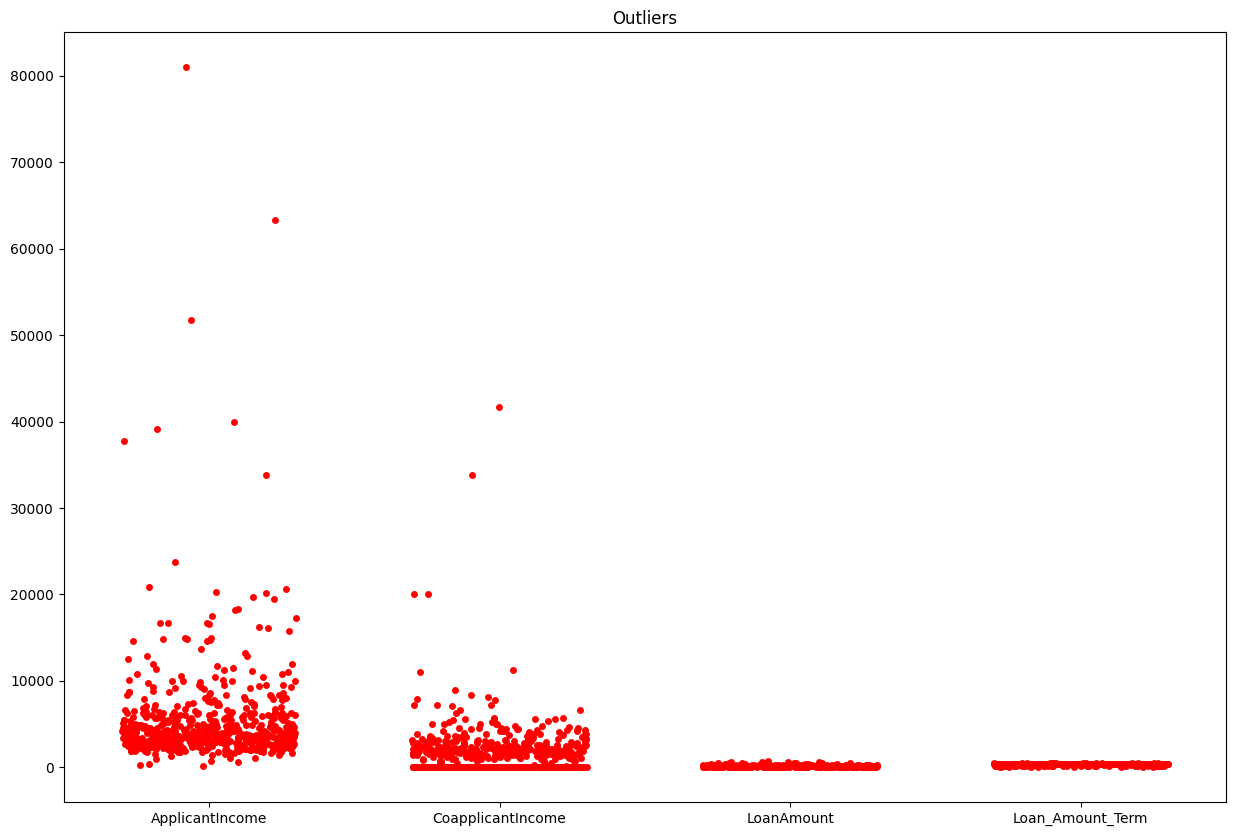

In [359]:
def plot_outliers(data,columns):
    # Set the figure size
    plt.figure(figsize=(15, 10))
    # Only variables that have outliers
    outliersColumns = data.get(columns)
    # Add outliers to the plot
    sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)
    # Set the axis labels and title
    plt.title("Outliers")
    # Show the plot
    plt.show()

plot_outliers(data,numeric_cols)

### Observations

1. **ApplicantIncome**:
   - Significant outliers are present, with some values exceeding `40,000` and the highest reaching `81,000`.
   - Most data points are concentrated below `10,000`.

2. **CoapplicantIncome**:
   - Outliers are visible, with values exceeding `20,000`, and the highest around `40,000`.
   - A large portion of data points are at `0`, indicating no co-applicant income.

3. **LoanAmount**:
   - A few outliers are present, with values exceeding `500` and the highest around `700`.
   - Most loan amounts are concentrated between `100` and `200`.

4. **Loan_Amount_Term**:
   - No significant outliers are visible; most values are concentrated at `360` months.


### Action Plan

1. **Remove Outliers**
   - removing outliers using IQR method

2. **Scaling**:
   - Scaling features for algorithms sensitive to feature magnitude.


---

## Remove Outliers

- We define a list of columns (col) that contain numerical data.

- Then, we calculate the first and third quartiles (Q1 and Q3) for these columns using the quantile function from NumPy.

- Next, we calculate the interquartile range (IQR) by subtracting Q1 from Q3.

- After that, we remove outliers from the dataset by filtering rows that have values outside the range defined by Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.

- Finally, we print the shape of the dataset after removing outliers to see if we didnt remove to much important data and saves the cleaned dataset to a CSV file named "cleaned_data.csv".

In [360]:
import numpy as np

# Removing Outliers of only numerical columns
outliers_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

# IQR Scaling
Q1 = data[outliers_columns].astype(np.float32).quantile(0.25)
Q3 = data[outliers_columns].astype(np.float32).quantile(0.75)

# Calcuate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Removing Qutliers
data = data[~((data[outliers_columns] < (Q1 - 1.5 * IQR)) |(data[outliers_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# saving the data for stage 2
data.to_csv("cleaned_data.csv", index=False)

# printing shape
print(" shape of data after removing outliers: ",data.shape)

 shape of data after removing outliers:  (535, 12)


## Normalize the data for numerical columns

We normalize the data of only the numerical columns to improve the performance of our future model

In [361]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

Plot data and distribution after removing outliers and normalizing numerical columns

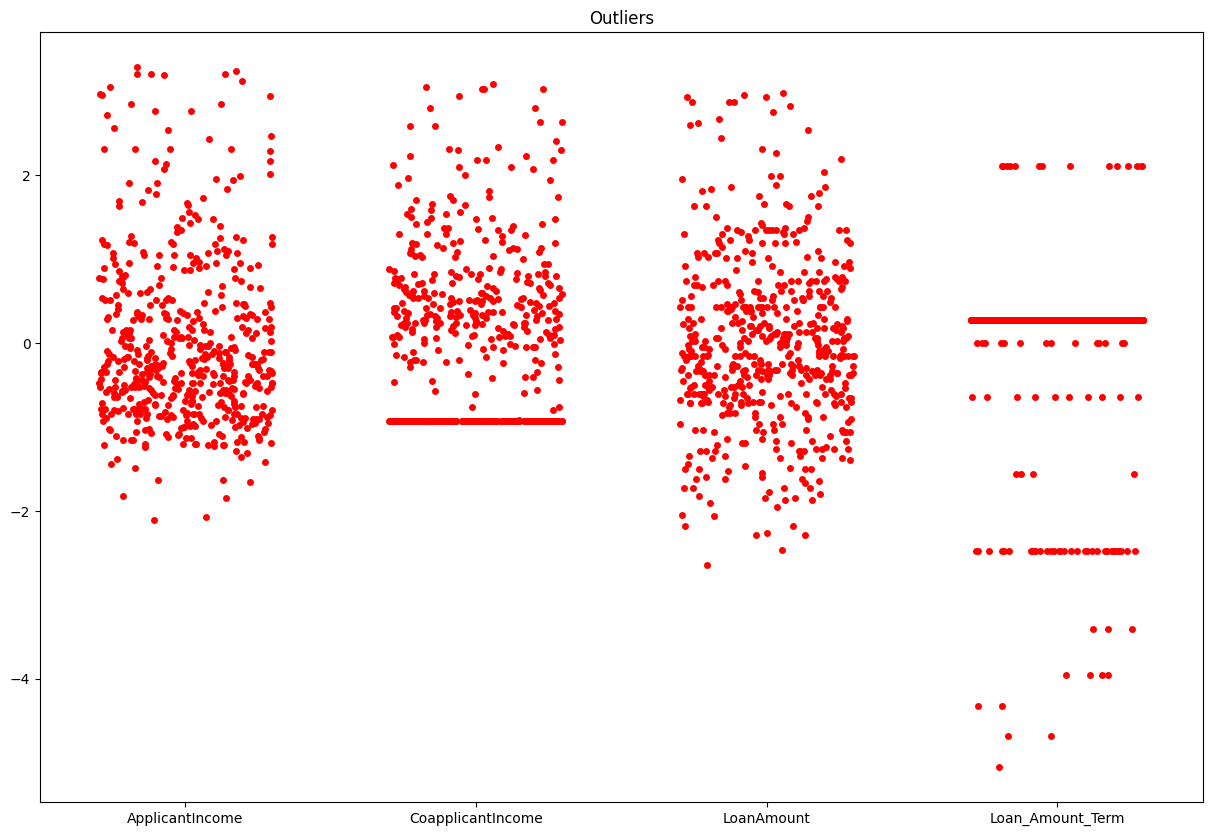

ApplicantIncome dtype: float64
CoapplicantIncome dtype: float64
LoanAmount dtype: float64
Loan_Amount_Term dtype: float64


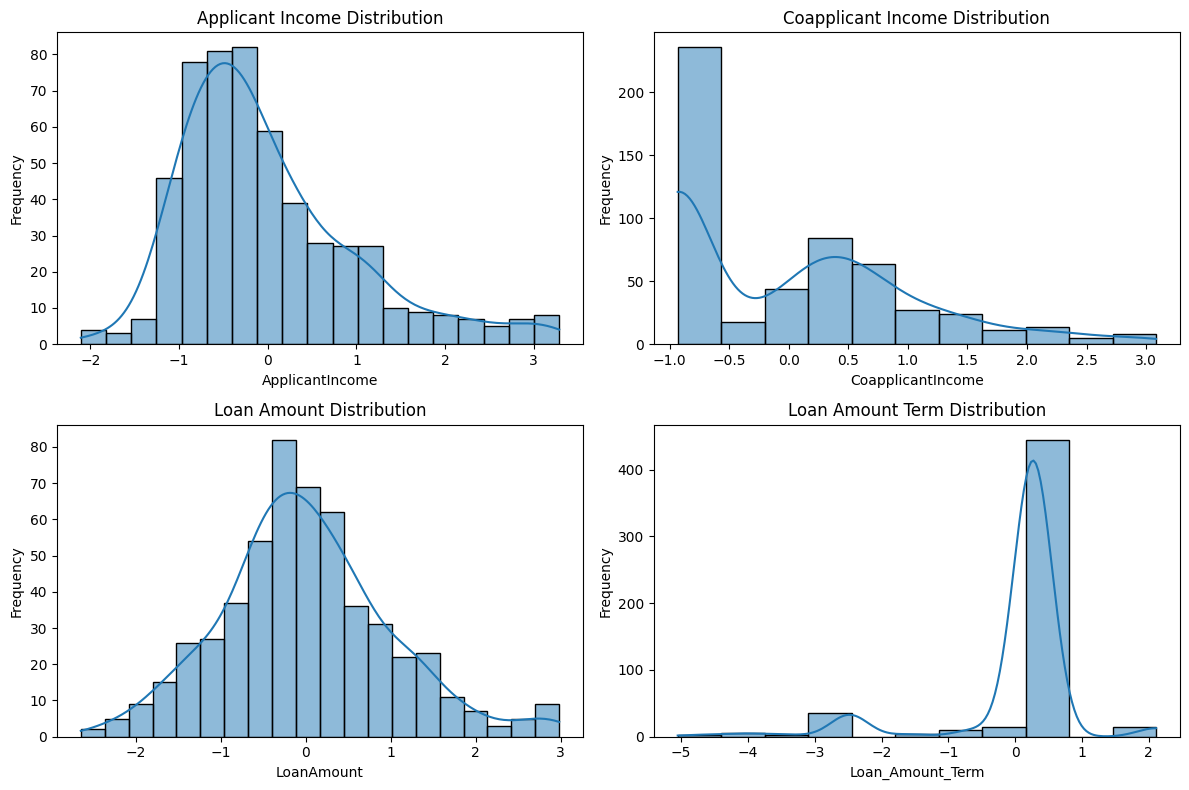

In [362]:
plot_outliers(data,numeric_cols)
plot_distributions(data, numeric_cols, titles)

The transformations effectively reduced the skewness and normalized the distributions for `ApplicantIncome`, `CoapplicantIncome`, `LoanAmountTerm` and `LoanAmount`.

---

# Model

## Model training

- Data Split: The data is split into features (X) and target (y), and then further split into training and testing sets using train_test_split.
- Model Definition: A Logistic Regression model is defined with max_iter=10000 and class_weight={0: 3, 1: 1} to handle class imbalance.
- Model Training: The model is trained on the training data using fit.
- Prediction: The trained model makes predictions on the testing data using predict.
- Evaluation: A classification report is generated using classification_report and converted into a DataFrame for display.
- Visualization: The classification report is plotted as a table using matplotlib.

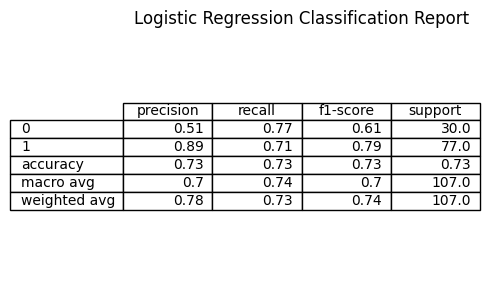

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

# Split the data into features and target
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Logistic Regression model
# using class_weight to balance the classes
model = LogisticRegression(max_iter=10000, class_weight={0: 2.5, 1: 1})
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, predictions, output_dict=True)

# Convert the report into a DataFrame for display
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
fig, ax = plt.subplots(figsize=(5, 3))
ax.axis('off')
ax.table(cellText=report_df.round(2).values, colLabels=report_df.columns, rowLabels=report_df.index, loc='center')
ax.set_title("Logistic Regression Classification Report", fontsize=12)

plt.tight_layout()
plt.show()


#### Observations:
1. **Class 0 (Loan Rejected)**:
   - **Precision**: `0.51` - 51% of the predicted rejections are correct.
   - **Recall**: `0.77` - 77% of actual loan rejections are correctly identified.
   - **F1-Score**: `0.61` - Represents the balance between precision and recall.

2. **Class 1 (Loan Approved)**:
   - **Precision**: `0.89` - 89% of the predicted approvals are correct.
   - **Recall**: `0.71` - 71% of actual loan approvals are correctly identified.
   - **F1-Score**: `0.79` - Indicates strong performance for the approval class.

3. **Overall Metrics**:
   - **Accuracy**: `0.73` - The model correctly predicts 73% of the cases.
   - **Macro Avg**:
     - Precision: `0.70`, Recall: `0.74`, F1-Score: `0.70` - Average performance across both classes, treating them equally.
   - **Weighted Avg**:
     - Precision: `0.78`, Recall: `0.73`, F1-Score: `0.74` - Weighted by the support of each class.


The logistic regression model demonstrates decent performance with an overall accuracy of **73%** and an AUC score of **0.82**. It performs well in predicting loan approvals (Class 1) with an F1-score of **0.79**, but its precision for loan rejections (Class 0) is lower at **0.51**.

This indicates the model is more likely to misclassify **approved loans as rejections** (false negatives for Class 1) rather than misclassifying rejections as approvals which is good news for our specific case.


---

## ROC curve

- Get Probabilities: The model's predicted probabilities for the positive class are obtained using predict_proba.
- Calculate ROC Curve: The ROC curve is calculated using roc_curve, which returns the False Positive Rate (FPR) and True Positive Rate (TPR) at different thresholds.
- Calculate AUC: The Area Under the Curve (AUC) is calculated using auc.
- Plot ROC Curve: The ROC curve is plotted using matplotlib, with the AUC value displayed in the legend.
Add Diagonal Line: A diagonal line is added to represent the performance of a random guess.

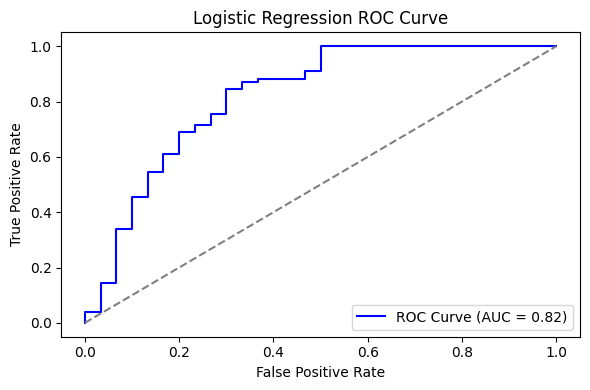

In [367]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

1. **AUC (Area Under Curve)**:
   - The AUC is `0.82`, indicating a good level of separability between the two classes (loan approved vs. loan rejected).
   - A value closer to `1` indicates better performance, while `0.5` suggests no discrimination (random guessing).

2. **True Positive Rate (TPR) vs. False Positive Rate (FPR)**:
   - The ROC curve shows how well the model balances TPR (sensitivity) and FPR at various thresholds.
   - The curve is well above the diagonal (random guessing line), suggesting the model performs significantly better than random.

3. **Threshold Trade-offs**:
   - At lower thresholds, the model achieves higher TPR but at the cost of increasing FPR.
   - At higher thresholds, the model reduces FPR but may miss true positives (lower TPR).

The model has a good ability to distinguish between loan approvals and rejections based on the AUC score.